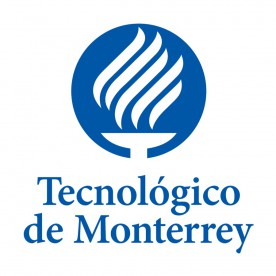

# **Masters in Applied Artificial Intelligence**
### **Course TC5033: Advanced Machine Learning Methods**
#### Tecnológico de Monterrey
#### José Antonio Cantoral Ceballos, Ph.D.<br><br>
### **Activity 3a: Exploring Word Embeddings with GloVe and Numpy**

**Group 4:**

- **Victor Alejandro Regueira Romero | A01794404 ​**
- **Fernando Maytorena Espinosa de los Monteros | A01110946​**
- **Alejandra Ramírez Romano | A01793144**
- **Jonathan Garza Bennet | A01793038​**<br><br>  
---
### **Objective:**
- To understand the concept of word embeddings and their significance in Natural Language Processing.
- To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
- To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

### **Instructions:**
- Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    *Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation*
    https://nlp.stanford.edu/data/glove.6B.zip

- Create a dictionary of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
- PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

- Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

- Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

- Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

### **Evaluation Criteria:**

- **Code Quality (40%):** Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
- **Functionality (60%):** All functions should work as intended, without errors.
   - Visualization of PCA and t-SNE (10% each for a total of 20%)
   - Similarity function (20%)
   - Analogy function (20%)



### **Import libraries**

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

import requests
import zipfile
import os
from rich import print

### **Load file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path = "/content/drive/MyDrive/MNA | Advanced Machine Learning Methods/assets/"

In [ ]:
# If you want to download the zip file straight from the source, unzip it and save it in this notebook; you should uncomment and run this code:


# URL for the GloVe embeddings
url = "https://nlp.stanford.edu/data/glove.6B.zip"

# Download the file
response = requests.get(url, stream=True)
with open("glove.6B.zip", "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

# Unzip the file
with zipfile.ZipFile("glove.6B.zip", "r") as z:
    z.extractall("glove.6B")

# Now you should have a directory called "glove.6B" containing the embeddings

filename = "/content/glove.6B/glove.6B.50d.txt"
path = filename
print(path)


/content/glove.6B/glove.6B.50d.txt

In [ ]:
# Use it if you already downloaded the dataset.

"""
filename = "glove.6B.50d.txt"
path = directory_path+filename
print(path)
"""

'\nfilename = "glove.6B.50d.txt"\npath = directory_path+filename\nprint(path)\n'

### **Create dictionary with embeddings**

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Load GloVe embeddings from the provided file path into a dictionary.

    Args:
    - path (str): Path to the GloVe embeddings file.

    Returns:
    - dict: A dictionary with words as keys and their embeddings as values.
    """

    # Initialize an empty dictionary to store the embeddings
    embeddings_dict = {}

    # Open the GloVe file and read line by line
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector

    return embeddings_dict

In [ ]:
# Create dictionary
embeddings_dict = create_emb_dictionary(path)

# Checking the size of the loaded embeddings and an example
len(embeddings_dict), embeddings_dict.get('king')

(400000,
 array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
        -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
        -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
        -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
         0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
         1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
         0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
        -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
        -0.64426 , -0.51042 ], dtype=float32))

In [ ]:
# Serialize
def save_embeddings(embeddings_dict, filename):
    """
    Serialize and save the embeddings dictionary to a file.

    Args:
    - embeddings_dict (dict): Dictionary containing word embeddings.
    - filename (str): Path to save the serialized dictionary.

    Returns:
    - None
    """

    with open(filename, 'wb') as file:
        pickle.dump(embeddings_dict, file)

# Save the test_dict to a serialized file for testing
save_embeddings(embeddings_dict, "/serialized_embeddings.pkl")

In [ ]:
# Deserialize
def load_embeddings(filename):
    """
    Deserialize and load the embeddings dictionary from a file.

    Args:
    - filename (str): Path to the serialized dictionary file.

    Returns:
    - dict: Dictionary containing word embeddings.
    """

    with open(filename, 'rb') as file:
        embeddings_dict = pickle.load(file)

    return embeddings_dict

# Load the serialized dictionary for testing
loaded_dict = load_embeddings("/serialized_embeddings.pkl")
len(loaded_dict), loaded_dict.get('king')


(400000,
 array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
        -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
        -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
        -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
         0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
         1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
         0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
        -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
        -0.64426 , -0.51042 ], dtype=float32))

#### See some embeddings

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
show_n_first_words(path, 5)

[
    'the',
    '0.418',
    '0.24968',
    '-0.41242',
    '0.1217',
    '0.34527',
    '-0.044457',
    '-0.49688',
    '-0.17862',
    '-0.00066023',
    '-0.6566',
    '0.27843',
    '-0.14767',
    '-0.55677',
    '0.14658',
    '-0.0095095',
    '0.011658',
    '0.10204',
    '-0.12792',
    '-0.8443',
    '-0.12181',
    '-0.016801',
    '-0.33279',
    '-0.1552',
    '-0.23131',
    '-0.19181',
    '-1.8823',
    '-0.76746',
    '0.099051',
    '-0.42125',
    '-0.19526',
    '4.0071',
    '-0.18594',
    '-0.52287',
    '-0.31681',
    '0.00059213',
    '0.0074449',
    '0.17778',
    '-0.15897',
    '0.012041',
    '-0.054223',
    '-0.29871',
    '-0.15749',
    '-0.34758',
    '-0.045637',
    '-0.44251',
    '0.18785',
    '0.0027849',
    '-0.18411',
    '-0.11514',
    '-0.78581'
]
50

[
    ',',
    '0.013441',
    '0.23682',
    '-0.16899',
    '0.40951',
    '0.63812',
    '0.47709',
    '-0.42852',
    '-0.55641',
    '-0.364',
    '-0.23938',
    '0.13001',
    '-0.063734',
    '-0.39575',
    '-0.48162',
    '0.23291',
    '0.090201',
    '-0.13324',
    '0.078639',
    '-0.41634',
    '-0.15428',
    '0.10068',
    '0.48891',
    '0.31226',
    '-0.1252',
    '-0.037512',
    '-1.5179',
    '0.12612',
    '-0.02442',
    '-0.042961',
    '-0.28351',
    '3.5416',
    '-0.11956',
    '-0.014533',
    '-0.1499',
    '0.21864',
    '-0.33412',
    '-0.13872',
    '0.31806',
    '0.70358',
    '0.44858',
    '-0.080262',
    '0.63003',
    '0.32111',
    '-0.46765',
    '0.22786',
    '0.36034',
    '-0.37818',
    '-0.56657',
    '0.044691',
    '0.30392'
]
50

[
    '.',
    '0.15164',
    '0.30177',
    '-0.16763',
    '0.17684',
    '0.31719',
    '0.33973',
    '-0.43478',
    '-0.31086',
    '-0.44999',
    '-0.29486',
    '0.16608',
    '0.11963',
    '-0.41328',
    '-0.42353',
    '0.59868',
    '0.28825',
    '-0.11547',
    '-0.041848',
    '-0.67989',
    '-0.25063',
    '0.18472',
    '0.086876',
    '0.46582',
    '0.015035',
    '0.043474',
    '-1.4671',
    '-0.30384',
    '-0.023441',
    '0.30589',
    '-0.21785',
    '3.746',
    '0.0042284',
    '-0.18436',
    '-0.46209',
    '0.098329',
    '-0.11907',
    '0.23919',
    '0.1161',
    '0.41705',
    '0.056763',
    '-6.3681e-05',
    '0.068987',
    '0.087939',
    '-0.10285',
    '-0.13931',
    '0.22314',
    '-0.080803',
    '-0.35652',
    '0.016413',
    '0.10216'
]
50

[
    'of',
    '0.70853',
    '0.57088',
    '-0.4716',
    '0.18048',
    '0.54449',
    '0.72603',
    '0.18157',
    '-0.52393',
    '0.10381',
    '-0.17566',
    '0.078852',
    '-0.36216',
    '-0.11829',
    '-0.83336',
    '0.11917',
    '-0.16605',
    '0.061555',
    '-0.012719',
    '-0.56623',
    '0.013616',
    '0.22851',
    '-0.14396',
    '-0.067549',
    '-0.38157',
    '-0.23698',
    '-1.7037',
    '-0.86692',
    '-0.26704',
    '-0.2589',
    '0.1767',
    '3.8676',
    '-0.1613',
    '-0.13273',
    '-0.68881',
    '0.18444',
    '0.0052464',
    '-0.33874',
    '-0.078956',
    '0.24185',
    '0.36576',
    '-0.34727',
    '0.28483',
    '0.075693',
    '-0.062178',
    '-0.38988',
    '0.22902',
    '-0.21617',
    '-0.22562',
    '-0.093918',
    '-0.80375'
]
50

[
    'to',
    '0.68047',
    '-0.039263',
    '0.30186',
    '-0.17792',
    '0.42962',
    '0.032246',
    '-0.41376',
    '0.13228',
    '-0.29847',
    '-0.085253',
    '0.17118',
    '0.22419',
    '-0.10046',
    '-0.43653',
    '0.33418',
    '0.67846',
    '0.057204',
    '-0.34448',
    '-0.42785',
    '-0.43275',
    '0.55963',
    '0.10032',
    '0.18677',
    '-0.26854',
    '0.037334',
    '-2.0932',
    '0.22171',
    '-0.39868',
    '0.20912',
    '-0.55725',
    '3.8826',
    '0.47466',
    '-0.95658',
    '-0.37788',
    '0.20869',
    '-0.32752',
    '0.12751',
    '0.088359',
    '0.16351',
    '-0.21634',
    '-0.094375',
    '0.018324',
    '0.21048',
    '-0.03088',
    '-0.19722',
    '0.082279',
    '-0.09434',
    '-0.073297',
    '-0.064699',
    '-0.26044'
]
50

[
    'and',
    '0.26818',
    '0.14346',
    '-0.27877',
    '0.016257',
    '0.11384',
    '0.69923',
    '-0.51332',
    '-0.47368',
    '-0.33075',
    '-0.13834',
    '0.2702',
    '0.30938',
    '-0.45012',
    '-0.4127',
    '-0.09932',
    '0.038085',
    '0.029749',
    '0.10076',
    '-0.25058',
    '-0.51818',
    '0.34558',
    '0.44922',
    '0.48791',
    '-0.080866',
    '-0.10121',
    '-1.3777',
    '-0.10866',
    '-0.23201',
    '0.012839',
    '-0.46508',
    '3.8463',
    '0.31362',
    '0.13643',
    '-0.52244',
    '0.3302',
    '0.33707',
    '-0.35601',
    '0.32431',
    '0.12041',
    '0.3512',
    '-0.069043',
    '0.36885',
    '0.25168',
    '-0.24517',
    '0.25381',
    '0.1367',
    '-0.31178',
    '-0.6321',
    '-0.25028',
    '-0.38097'
]
50

### **Embeddings visualization: PCA and t-SNE**

<p align="justify">Word embeddings capture the semantic relationships between words in a high-dimensional space. While these embeddings are often hundreds or even thousands of dimensions, it's challenging to visualize and interpret them directly. Dimensionality reduction techniques, such as PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding), allow us to project these high-dimensional vectors into a 2D or 3D space, making them more interpretable and visualizable.</p>

##### **PCA (Principal Component Analysis):**
<br>
<p align="justify">PCA is a linear dimensionality reduction technique that identifies the axes in the original space that maximize variance. When applied to word embeddings, the first few principal components often capture a significant amount of the variance, allowing us to project embeddings into a lower-dimensional space (usually 2D or 3D) while retaining most of the original information.</p>

<br>
<p align="center">$\text{PCA projection = E × P}$</p>

<br>

<p align="justify">Where $\text{E}$ is the matrix of embeddings and $\text{P}$ is the matrix of principal components.</p>

In [ ]:
#Function to apply PCA using Numpy
def numpy_pca(data, n_components=2):
    """
    Perform PCA using numpy.

    Args:
    - data (numpy.ndarray): Data matrix with rows as data points.
    - n_components (int): Number of components to keep.

    Returns:
    - numpy.ndarray: Reduced data matrix.
    """

    # Mean centering
    mean_centered_data = data - np.mean(data, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(mean_centered_data, rowvar=False)

    # Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_indices = sorted_indices[:n_components]
    top_eigenvectors = eigenvectors[:, top_indices]

    # Project the data
    reduced_data = np.dot(mean_centered_data, top_eigenvectors)

    return reduced_data

In [ ]:
#Function to plot the data with reduced dimensionality
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func):
    """
    Plot word embeddings after reducing their dimensions using the specified function.

    Args:
    - emb_path (str): Path to the embeddings (currently not used in the function).
    - words2show (list): List of words to visualize.
    - emb_dim (int): Number of dimensions to reduce the embeddings to (either 2 or 3).
    - embeddings_dict (dict): Dictionary of word embeddings.
    - func (function/str/Literal, optional): Dimensionality reduction function or method. Default is PCA.

    Returns:
    - None
    """

    # Create the embeddings dictionary from the provided path
    embeddings_dict = create_emb_dictionary(emb_path)

    # Extract the embeddings for the specified words
    vectors = np.array([embeddings_dict[word] for word in words2show])

    # Apply the dimensionality reduction
    if func == 'numpy_pca':
        reduced_vectors = numpy_pca(vectors, n_components=emb_dim)
    elif func == 'numpy_tsne':
        reduced_vectors = numpy_tsne(vectors, n_components=emb_dim)
    else:
        reduced_vectors = func(n_components=emb_dim).fit_transform(vectors)

    # Plot the reduced embeddings
    plt.figure(figsize=(10, 7))
    if emb_dim == 2:
        plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
        for i, word in enumerate(words2show):
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    elif emb_dim == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])
        for i, word in enumerate(words2show):
            ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)
    plt.show()

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

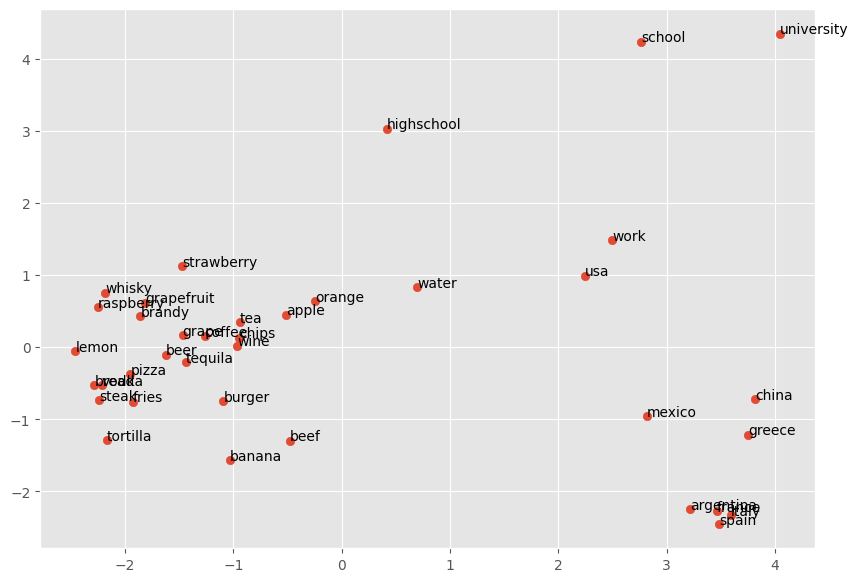

In [ ]:
# Plot embeddings in a two-dimensional chart using PCA
plot_embeddings(path, words, 2, embeddings_dict, func='numpy_pca')

##### **t-SNE (t-distributed Stochastic Neighbor Embedding):**
<br>
<p align="justify">Unlike PCA, t-SNE is a non-linear dimensionality reduction technique that works by preserving the local structure of data. It calculates the similarity between points in the high-dimensional space and then finds a low-dimensional representation that best preserves these similarities.</p>

<br>

<p align="center">$\text{Similarity in original space} - \frac{\exp(-||\mathbf{x}_i - \mathbf{x}_j||^2 / 2\sigma^2)}{\sum_{k \neq i} \exp(-||\mathbf{x}_i - \mathbf{x}_k||^2 / 2\sigma^2)}$</p>

<br>

<p align="justify">Where $\mathbf{x}_i$ and $\mathbf{x}_j$ are two data points in the high-dimensional space, and $\sigma$ is a scaling parameter.</p>

In [ ]:
#Function to apply t-SNE using Scikit-learn
def numpy_tsne(data, n_components=2, **kwargs):
    """
    Perform t-SNE using Scikit-learn's TSNE as a reference.

    Args:
    - data (numpy.ndarray): Data matrix with rows as data points.
    - n_components (int): Number of components to reduce to (either 2 or 3).
    - **kwargs: Additional arguments for Scikit-learn's TSNE.

    Returns:
    - numpy.ndarray: Reduced data matrix.
    """

    #Assing t-SNE with the function inputs
    model = TSNE(n_components=n_components, **kwargs)

    #Apply t-SNE
    reduced_data = model.fit_transform(data)

    return reduced_data

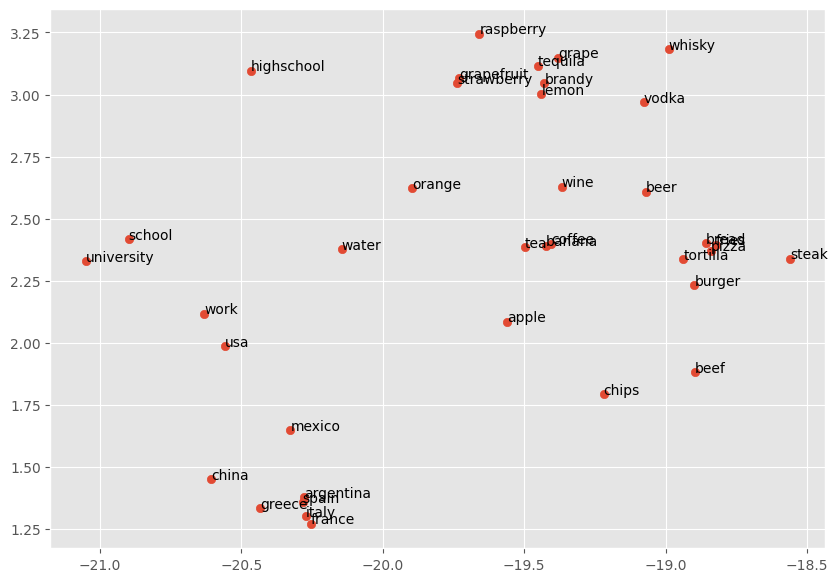

In [ ]:
# Plot embeddings in a two-dimensional chart using t-SNE
plot_embeddings(path, words, 2, embeddings_dict, func='numpy_tsne')

### **Most similar words**

To compute word similarity, we typically use the cosine similarity metric. Given two vectors $\mathbf{A}$ and $\mathbf{B}$, the cosine similarity is calculated as:

<br>

<p align="center">$\text{cosine similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\| \mathbf{A} \|_2 \times \| \mathbf{B} \|_2}$
<br>

Where $\mathbf{A}$ $\cdot$ $\mathbf{B}$ is the dot product of the vectors, and $ \| \mathbf{A} \|_2 $ is the L2 norm (or Euclidean norm) of vector $\mathbf{A}$.

The process for the word similarity function will be:

1. Calculate the cosine similarity between the given word's embedding and the embeddings of all other words in the dictionary.
2. Sort the words based on their similarity scores.
3. Return the top 'n' words.


In [ ]:
#Function to calculate cosine similarity between two word embeddings
def cosine_similarity(A, B):
    """
    Compute the cosine similarity between two vectors A and B.

    Args:
    - A (numpy.ndarray): Vector A.
    - B (numpy.ndarray): Vector B.

    Returns:
    - float: Cosine similarity between vectors A and B.
    """
    #Perform dot product
    dot_product = np.dot(A, B)

    #Calculate each vector norm
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return dot_product / (norm_A * norm_B)

In [ ]:
#Function that finds most similar words on a word embedding dictionary
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the 'n' most similar words to the given word based on their embeddings.

    Args:
    - word (str): The word to find similarities for.
    - embeddings_dict (dict): Dictionary of word embeddings.
    - n (int, optional): Number of similar words to return. Default is 5.

    Returns:
    - list: List of 'n' most similar words.
    """

    # Check if the word is in the embeddings dictionary
    if word not in embeddings_dict:
        return f"The word '{word}' is not in the embeddings dictionary."

    # Compute the similarity scores
    target_vector = embeddings_dict[word]
    similarity_scores = {other_word: cosine_similarity(target_vector, other_vector)
                         for other_word, other_vector in embeddings_dict.items()}

    # Sort words based on similarity scores
    sorted_words = sorted(similarity_scores, key=similarity_scores.get, reverse=True)

    # Exclude the input word and return the top 'n' words
    most_similar_words = [w for w in sorted_words if w != word][:top_n]

    return most_similar_words

In [ ]:
#Look for the most similar words and display the result
most_similar = find_most_similar('mexico', embeddings_dict)
print(most_similar)
print("------------------------------------------------------------------------------------------------------")
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

['mexican', 'venezuela', 'colombia', 'peru', 'chile', 'puerto', 'rico', 'cuba', 'guatemala', 'panama']

------------------------------------------------------------------------------------------------------

1 ---> mexican

2 ---> venezuela

3 ---> colombia

4 ---> peru

5 ---> chile

6 ---> puerto

7 ---> rico

8 ---> cuba

9 ---> guatemala

10 ---> panama

### **Solve an analogy**

To solve word analogies, we typically employ the following vector arithmetic:

Given the analogy "A is to B as C is to D", the word ${D}$ (the answer) can be approximated as: ${D ≈ B − A + C}$

In the example "man is to king as woman is to ____", $A$ is 'man', $B$ is 'king', and $C$ is 'woman'. Thus, the vector representation of the answer is:
<br><br>

<p align="center">${D} ≈ \text{embedding}(\text{’king’}) − \text{embedding}(\text{’man’}) + \text{embedding}(\text{’woman’})$
<br><br>

After computing ${D}$, we search for the word in our vocabulary that has the most similar vector representation to ${D}$ using cosine similarity.

In [ ]:
#Function to solve an analogy using word embeddings
def analogy(A, B, C, embeddings_dict):
    """
    Solve the analogy "A is to B as C is to ____".

    Args:
    - A (str): First word in the analogy.
    - B (str): Second word in the analogy.
    - C (str): Third word in the analogy.
    - embeddings_dict (dict): Dictionary of word embeddings.

    Returns:
    - str: Word that completes the analogy.
    """

    # Check if the words are in the embeddings dictionary
    if A not in embeddings_dict or B not in embeddings_dict or C not in embeddings_dict:
        return "One or more words are not in the embeddings dictionary."

    # Compute the vector for D
    D = embeddings_dict[B] - embeddings_dict[A] + embeddings_dict[C]

    # Find the word with the most similar vector to D
    max_similarity = -float('inf')
    best_word = None

    for word, vector in embeddings_dict.items():

        #Exclude the same words used in the analogy
        if word not in [A, B, C]:
            similarity = cosine_similarity(D, vector)

            #Select the word with the highest similarity
            if similarity > max_similarity:
                max_similarity = similarity
                best_word = word

    return best_word

In [ ]:
A = 'man'
B = 'king'
C = 'woman'
analogy = analogy('man', 'king', 'woman', embeddings_dict)
print(f"{A} is to {B} as {C} is to {analogy}")

man is to king as woman is to queen

### **Conclusion**

<p align="justify">In this activity, we explored the rich landscape of word embeddings using pre-trained GloVe vectors. By visualizing these embeddings through PCA and t-SNE, we observed how semantically related words cluster together. Our exploration into word similarity and analogy tasks showcased the power of embeddings in capturing intricate semantic relationships. Using vector operations, we were able to discern relationships, such as "man is to king as woman is to queen", underscoring the depth of information embedded in these vectors.</p>

<p align="justify">Overall, this activity highlighted the pivotal role of word embeddings in modern Natural Language Processing and their potential in unveiling the nuances of language. Moreover, it's important to mention that word embeddings are still the foundation of the newer and more powerful generative pretrained models that use the attention mechanism, and that have been driving innovation more recently.</p>